In [37]:
import string
import pandas as pd
import numpy as np 
import random

import boto3
import json

from pprint import pprint
import time

import nltk
from nltk.corpus import stopwords
stopwords = stopwords.words('english')

from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag

import spacy
from spacy import displacy
from collections import Counter
import en_core_web_sm
nlp = en_core_web_sm.load()

import pytesseract as tess
from PIL import Image
from IPython.display import *
import matplotlib.pyplot as plt
import matplotlib.image as mpimg



figure = plt.figure(figsize = (10,5));


import matplotlib.pyplot as plt;
%matplotlib inline
%pylab inline


Populating the interactive namespace from numpy and matplotlib


/Users/fox/anaconda3/envs/newEnv/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['random', 'figure']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [38]:
# load the aws passwords
passwords = pd.read_csv('passwords.csv')
access_key  = passwords['access_key'][0]
secret_key  = passwords['secret_key'][0]

# EDA

In [40]:
data = pd.read_csv('data/char_1.csv')
data.sort_values('en_name', inplace= True)
data.sample(2)

,ar_name,en_name,description,method,frequency,dosagerange,affectiontime,affectionperiod,nutrition,storage,...,medecinestop,excessdosing,pregnancy,breastfeed,children,olds,driving,surgery,sideeffects,commercialnames
642,موميتازون,Mometasone,موميتازون (Mometasone) هو دواء ينتمي لمجموعة ا...,مرهم، كريم للتدهين، رذاذ للأنف.,مرهم / كريم: مرة واحدة في اليوم.\nرذاذ الأنف: ...,مرهم / كريم: يتوجب دهن طبقة دقيقة في المناطق ا...,مرهم / كريم: قد تمر بضعة أسابيع حتى بدء ملاحظة...,رذاذ الأنف: يستمر تأثير مفعول الدواء لمدة 24 س...,لا توجد تقييدات.,NaN,...,لا يجوز إيقاف تناول الدواء دون استشارة الطبيب.,إذا أخِذَت جرعة مفرطة مصادفة، فليس من المفترض ...,أظهرت الأبحاث التي أجريت على الحيوانات المخبري...,لم يثبت ان استعمال الدواء آمن للمرضعات. لا ينص...,لا ينصح باستعماله تحت جيل سنتين، الا بتوصيه من...,من المحتمل ان تكون هنالك حاجه لتقليل الجرعه ال...,لا توجد مشاكل معروفه.,يجب ابلاغ الطبيب الجراح او الطبيب المخدر عن اس...,تهيج موضعي\nشيوع التاثير: دارج\nابلاغ الطبيب: ...,"['موميديرم', 'مومديرم', 'اكزاديرم', '%', '-', ..."
391,إيزيتيميب,Ezetimibe,إن إيزيتيميب (Ezetimibe) هو دواء جديد لعلاج مس...,أقراص,يؤخذ الدواء مرّة يوميًّا,الجرعة: 10 مغم يوميًّا,2 - 3 ساعات,24 ساعة.,لا توجد تقييدات. يجب دمج العلاج بالإيزيتيميب ب...,NaN,...,يُمنع التوقّف عن تناول الدّواء دون استشارة طبيب.,لا تتوفر معلومات كافية حول تأثير الجرعة الزائد...,لا تتوفر معلومات كافية حول سلامة استعمال الدوا...,لم يثبت ان استعمال الدواء آمن للمرضعات. لا ينص...,لا ينصح باستعماله للاطفال تحت جيل 12 سنه، الا ...,لا توجد مشاكل خاصه.,لا توجد مشاكل معروفه.,NaN,تعب\nشيوع التاثير: دارج\nابلاغ الطبيب: في كل ح...,"['ايزيترول', '&', 'اينيجي', '-', '&', 'اينيجي'..."


In [41]:
data.columns

Index(['ar_name', 'en_name', 'description', 'method', 'frequency',
       'dosagerange', 'affectiontime', 'affectionperiod', 'nutrition',
       'storage', 'forgotenmeal', 'medecinestop', 'excessdosing', 'pregnancy',
       'breastfeed', 'children', 'olds', 'driving', 'surgery', 'sideeffects',
       'commercialnames'],
      dtype='object')

In [42]:
print(f'The original shape is: {data.shape}')

The original shape is: (681, 21)


In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 681 entries, 653 to 527
Data columns (total 21 columns):
ar_name            681 non-null object
en_name            681 non-null object
description        681 non-null object
method             678 non-null object
frequency          677 non-null object
dosagerange        679 non-null object
affectiontime      680 non-null object
affectionperiod    680 non-null object
nutrition          675 non-null object
storage            366 non-null object
forgotenmeal       680 non-null object
medecinestop       672 non-null object
excessdosing       680 non-null object
pregnancy          680 non-null object
breastfeed         680 non-null object
children           680 non-null object
olds               680 non-null object
driving            678 non-null object
surgery            573 non-null object
sideeffects        681 non-null object
commercialnames    681 non-null object
dtypes: object(21)
memory usage: 117.0+ KB


* As we saw there is a Null values, but we can't fill null's =D

In [44]:
data.iloc[55]

ar_name                                                     أميكاسين
en_name                                                     Amikacin
description        أميكاسين (Amikacin) هو مضاد حيوي (Antibiotic) ...
method                                حَقـْن في العضلة أو في لوريد. 
frequency          مدة العلاج بهذا الدواء لا تزيد، بشكل عام، عن 7...
dosagerange        يتم تحديد الجرعة بشكل فردي، حسب وزن جسم المريض...
affectiontime      إذا لم يطرأ تحسن في الوضع الصحي بعد 3 - 5 أيام...
affectionperiod                يستمر تأثير الوجبة لمدة 8 - 12 ساعة. 
nutrition                                   ليست هنالك أية تقييدات. 
storage                                                          NaN
forgotenmeal       من غير المرجح حدوث ذلك، لأن العلاج يعطى بواسطة...
medecinestop       يجب إتمام العلاج بكامله. فحتى إذا حصل تحسن في ...
excessdosing       ليس من المرجح حدوث ذلك، لأن العلاج يتم تحت رقا...
pregnancy          أظهرت الأبحاث التي أجريت على الحيوانات أن هذا ...
breastfeed         لم يثبت ان استع

In [45]:
cols = data.columns
for i, items in enumerate(data.iloc[55]):
    print(f'Column name: {cols[i]}\nData:\n{items}')
    print('-'*50)

Column name: ar_name
Data:
أميكاسين
--------------------------------------------------
Column name: en_name
Data:
Amikacin
--------------------------------------------------
Column name: description
Data:
أميكاسين (Amikacin) هو مضاد حيوي (Antibiotic) ينتمي إلى عائلة الأمينوغليكوزيدات (Aminoglycoside). يتم استخدام أميكاسين لمعالجة مجموعة واسعة من التلوثات (الالتهابات)، منها: التهابات المسالك التنفسية، التهابات في الجلد، التهابات في المسالك البولية، التهابات في الدم وفي العظام. تتمثل آلية عمل الأميكاسين في تأخير تثبيط عملية تكاثر الجراثيم (البكتيريا) وتضاعفها، وخاصة الجراثيم السلبية الغرام (Gram - negative bacterium)، مثل تلك التي تسبب التهاب المسالك البولية، وجزء من الجراثيم الإيجابية الغرام (Gram - positive bacterium)، مثل تلك التي تسبب التهاب الشغاف (Endocarditis). يستخدم أميكاسين في الخط الثاني من معالجة الالتهابات التي أظهرت مقاومة لمضادات حيوية أخرى من عائلة الأمينوغليكوزيد، مثل: جنتاميسين (Gentamicin) وتوبراميسين (Tobramycin). الآثار الجانبية الرئيسية للأميكاسين، مثل الاضطراب الكل

* There is `NaN features`, so if it exit we sholud print it.
* in sotrage feature in data.iloc[55]

# Check for duplicates

In [46]:
data['en_name'][:20]

653    (5-aminosalicylic acid) Mesalamine
61                               Abacavir
148                              Acarbose
150                              Acarbose
151                              Acarbose
149                              Acarbose
135                            Acebutolol
126                         Acetazolamide
141                        Acetylcysteine
140                             Acitretin
143                             Acyclovir
145                             Acyclovir
144                             Acyclovir
142                             Acyclovir
86                             Adalimumab
84                              Adapalene
85                              Adapalene
87                               Adefovir
89                              Adenosine
88                              Adenosine
Name: en_name, dtype: object

* As we saw **`there are some duplicate drugs`**, so let's drop it.

In [47]:
data.drop_duplicates(inplace = True) 
print(f'The new shape of removed duplicates is: {data.shape}')

The new shape of removed duplicates is: (335, 21)


In [48]:
data['en_name'][:20] # no duplicates :)

653    (5-aminosalicylic acid) Mesalamine
61                               Abacavir
148                              Acarbose
135                            Acebutolol
126                         Acetazolamide
141                        Acetylcysteine
140                             Acitretin
143                             Acyclovir
86                             Adalimumab
84                              Adapalene
87                               Adefovir
89                              Adenosine
161                            Adrenaline
192                           Albendazole
202                           Aldesleukin
225                             Alefacept
217                           Alemtuzumab
231                           Alendronate
211                          Alfacalcidol
213                             Alfuzosin
Name: en_name, dtype: object

### Distribution for each word len

In [49]:
from collections import Counter

counter_list, words_len = [], []
for word in data['en_name']:
    words_len.append(len(word))

counter_list = Counter(words_len)
pprint(counter_list)


Counter({10: 84,
         9: 55,
         11: 55,
         12: 44,
         8: 24,
         13: 17,
         14: 9,
         7: 8,
         16: 7,
         19: 6,
         15: 6,
         17: 4,
         21: 3,
         20: 3,
         34: 2,
         29: 2,
         18: 2,
         27: 1,
         3: 1,
         4: 1,
         24: 1})


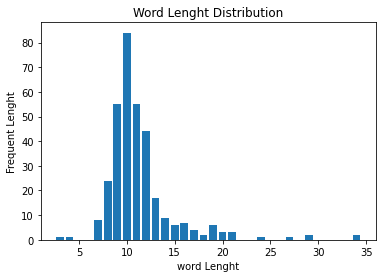

In [50]:
plt.bar(counter_list.keys(), counter_list.values());
plt.title('Word Lenght Distribution')
plt.xlabel('word Lenght')
plt.ylabel('Frequent Lenght');

# Helper Fucntions:

In [51]:
def items_to_speech(drug_name):
    '''
        * take   -> Specific drug name
        * return -> some information about it as an audio.
    '''
    for drug_indx, drug in enumerate(data['en_name']):
        if drug_name == drug:
            ar_drug_name = data.iloc[drug_indx]['ar_name']
            en_drug_name = data.iloc[drug_indx]['en_name']
            drug_index   = drug_indx
            return [drug_index, ar_drug_name, en_drug_name]

    

def NER(sent):
    '''
        * take   -> list of words
        * return -> list of NN  
    '''
    sent = nltk.word_tokenize(sent)
    sent = nltk.pos_tag(sent)
    sent = [word for (word,ent) in sent if ent == 'NN']
    return sent
                
    

def image_preprocessing(text):
    '''
        * Take        -> list of words
        * Return      -> list of NN 
        * Description -> make each word as a lower case and join all words to be a one sentence,
                          then split the sentence to with get the word length >= 3 and also for unique words 
                          and call NET function for extrack just NN 
        
        ['RPG', 'BP Tablets Azathioprine', 'X Tablets 10 10', 'mg']
        
        ['rpg bp tablets azathioprine x tablets 10 10 50 mg']
        
        ['rpg', 'bp', 'tablets', 'azathioprine', 'x', 'tablets', '10', '10', '50', 'mg']
        
        ['azathioprine', 'tablets']
        
    '''
    text  = " ".join([word.lower() for word in text]).split()
    text  = list(set(word for word in text if len(word) >= 3))
#     text = NER(" ".join(text)) # make list to string for get NN .. Not working well
    return text


def speech_preprocessing(text_str):
    '''
        * Take        -> a string
        * Return      -> list of NN 
        * Description -> remove punctuations and split it and make it lower, remove stop words,
                         and call NET fuction for extract just NN
    '''
    text_str = "".join([ch for ch in text_str if ch not in string.punctuation]).split()
    text_str = [word.lower() for word in text_str if word not in stopwords]
#     text_str = NER(" ".join(text_str)) # make list to string for get NN
    return text_str


   
def matching(preprocessed_words_list):
    '''
        * Take        -> list of list of preprocessing word 
        * Return      -> list of 3 valuse -> [drug_index, ar_drug_name, en_drug_name]
        * Description -> capitalize preprocessed_words_list we receive preprocessed_words_list which is the text in the image 
                         and split it, then check if each splited word in the data, and if exist
                         will return the indcies of it and the Arabic and also English name.
                         
                         * We will use the index for get whole inforation by passing it to function printing,
                           and use the Arabic and English names for speeching by aws ploy.
         
    '''
    cols = data.columns
    preprocessed_words_list = [word.capitalize() for word in preprocessed_words_list]
    for drug_indx, drug in enumerate(data['en_name']):
        for word in preprocessed_words_list:
            if word == drug:
                ar_drug_name = data.iloc[drug_indx]['ar_name']
                en_drug_name = data.iloc[drug_indx]['en_name']
                drug_index   = drug_indx
                return [drug_index, ar_drug_name, en_drug_name]

                    
def printing(drug_indx):
    '''
        * Take     -> the first inedx of returned list of matcing function which is the drug index
        * Return   -> whole information about the durg
 
    '''
    for col_indx, item in enumerate(data.iloc[drug_indx]):
                    print(f'Column name: {cols[col_indx]}\nData:\n{item}')
                    print('-'*50)


# Service as a functions:

## 1- Image To Text:
* searching by text

In [52]:
def image_to_text(image_name = '3_En.JPG'):
    # 1- include all i need 
    bucket_name = 'saidaliabucket'
    image_name  = image_name
    region_name = 'us-east-2'


    # 2- useing Amazon S3 storiage
    s3 = boto3.resource('s3')

    # 3- connect with aws rekognition
    client = boto3.client(
        'rekognition',
        region_name = region_name,
        aws_access_key_id= access_key,
        aws_secret_access_key= secret_key)                            

    # 4- detect image
    response = client.detect_text(
        Image={
            'S3Object': {
                'Bucket': bucket_name,
                'Name': image_name
            }
        }
    )

    # 5- get all results
    image_to_text_data_list = list()
    for item in response['TextDetections']:
        image_to_text_data_list.append(item['DetectedText'])
        
    # image preprocessing fuction
    drug_list = image_preprocessing(image_to_text_data_list)

    # matcing function 
    some_drug_info = matching(drug_list)
    
    # all drug information
    whole_drug_info = printing(some_drug_info[0])
    
    
    # get the final results
    print(whole_drug_info)

## 2- Speech to text:
* searching by voice

In [63]:
def speech_to_text(speech_name = 'Asprien.mp3'):
    
    # 1- include all we need 
    record_name = speech_name
    bucket_name = 'amazonesaidaliatranscribe'
    region_name = 'us-east-2'

#     print(bucket_name)
#     print(access_key)
#     print(secret_key)


    # 2- connect with aws transcribe
    transcribe  = boto3.client('transcribe',
                                aws_access_key_id = access_key,
                                aws_secret_access_key = secret_key,
                                region_name = region_name,)


    # generating random integers, because each job should have a unique name
    num = random.randint(1, 1001)
    transcription_job_name = f'saidaliaJob{num}'

    # 3- convert speech to text 
    transcribe.start_transcription_job(
              TranscriptionJobName = transcription_job_name,
              Media={'MediaFileUri': f's3://{bucket_name}/{record_name}'},
              MediaFormat = 'mp3',
              LanguageCode='en-US') #Gulf Arabic (ar-AE) , Modern Standard Arabic (ar-SA)


    # reading the json file only after transcription is completed 
    while True:
        result = transcribe.get_transcription_job(TranscriptionJobName = transcription_job_name)
        if result['TranscriptionJob']['TranscriptionJobStatus'] in ['COMPLETED', 'FAILED']:
            break

    if result['TranscriptionJob']['TranscriptionJobStatus'] == 'COMPLETED':
        df = pd.read_json(result['TranscriptionJob']['Transcript']['TranscriptFileUri'])

    # extracting the transcription
    speech_to_text_data_str = df['results']['transcripts'][0]['transcript']
    
    # speech preprocessing function
    drug_list = speech_preprocessing(speech_to_text_data_str)
    
    # matcing function 
    some_drug_info = matching(drug_list)
    
    # all drug information
    whole_drug_info = printing(some_drug_info[0])
    
    
    # get the final results
    print(whole_drug_info)

## 3- Text to speech:


In [54]:
def text_to_speech(text, file_name, selecting_lang = 'en'):
    # 1- include all we need 
    region_name = 'us-east-2'
    output_format = 'mp3'
    
    #  choosing the language and speaker 
    info = {
            'ar':  {'lan': 'arabic' , 'voice_id': 'Zeina' , 'lan_code': 'arb'},
            'en': {'lan': 'english','voice_id': 'Brian', 'lan_code': 'en-US'},
        }
    
    # 2- connect with aws rekognition
    client = boto3.Session(
                    aws_access_key_id = access_key,                     
                    aws_secret_access_key = secret_key,
                    region_name = region_name).client('polly')

    response = client.synthesize_speech(VoiceId = info[selecting_lang]['voice_id'],
                    OutputFormat = output_format, 
                    LanguageCode = info[selecting_lang]['lan_code'],
                    Text = text)

    # opening the speech file then puting the audio in it and then closing it
    file = open(file_name, 'wb')
    file.write(response['AudioStream'].read())
    file.close()
    

# Test Functions:

## **`Searching by image`**
* If i capturer like this image, i will get whole information about the exact drug in the drug box

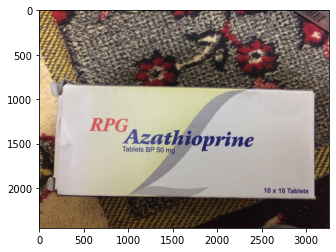

In [55]:
image_name = '3_En.JPG'
img = mpimg.imread(image_name)
imgplot = plt.imshow(img);
plt.show();

In [56]:
the_drug = image_to_text(image_name)
print(the_drug)

Column name: ar_name
Data:
ازاثيوبرين
--------------------------------------------------
Column name: en_name
Data:
Azathioprine
--------------------------------------------------
Column name: description
Data:
ينتمي أزاثيوبرين (Azathioprine) إلى فئة الأدوية التي تقمع جهاز المناعة. إن هذه العملية مهمة بعد زراعة أعضاء، وذلك لكي لا يرفض الجهاز المناعي العضو المزروع. يستخدم ازاثيوبرين أساسًا لتثبيط جهاز المناعة بعد زراعة الكُلى، وبشكل عام يعطى بالإضافة إلى علاجات أخرى لتثبيط جهاز المناعة، التي تحتوي على كورتيكوستيروئيدات (Corticosteroids)، العلاج الإشعاعي وأدوية أخرى لتثبيط جهاز المناعة. إن الأزاثيوبرين فعال أيضًا في علاج التهاب المفاصل الروماتوئيدي (Rheumatoid Arthritis) الذي لا يستجيب لعلاجات أخرى، وفي أمراض أخرى التي فيها يهاجم جهاز المناعة أنسجة الجسم (المناعة الذاتية - Autoimmunity) مثل : الذئبة الحُمامِيَّة المَجْموعِيَّة (Systemic Lupus Eruthymatosus)، فقر الدم الانحلالي (Hemolytic Anemia)، الفُرْفُرِيَّة القليلة الصَّفيحات مجهولة السبب (Idiopathic Thrombocytopinc Purpura) والفُقاع

## **`Searching by Voice`** 
* if i searched for the drug name by voice to get information about it.

In [57]:
record_name = 'Asprien.mp3'
Audio(record_name, autoplay=True)

In [64]:
the_drug = speech_to_text(record_name)
print(the_drug)

Column name: ar_name
Data:
الأسبرين
--------------------------------------------------
Column name: en_name
Data:
Aspirin
--------------------------------------------------
Column name: description
Data:
انتشر استخدام الأسبرين (Aspirin) منذ أكثر من 80 عامًا، وهو مضاد غير إستروئيدي للالتهاب يستخدم لتسكين الآلام، تخفيض درجة الحرارة، وتقليل أعراض التهاب المفاصل، كما أنه يساهم – إذا استخدم بكمية قليلة – بمنع تكوُّن خَثَرات  دموية. يظهر الأسبرين على عدّة أشكال وخلطات كدواء لعلاج الرشح، آلام الدورة الشهرية، آلام الرأس وكذلك آلام العضلات والمفاصل. إحدى السيئات في الأسبرين هو ميله لتهييج المعدة، بل وحتى التسبب بالنزيف. وسيئة أخرى – هو أنه من الممكن أن يسبب داء "رِيِّي" (Reyes) – مرض نادر يصيب الدماغ والكبد، ويظهر بشكل عام لدى الأطفال. لذلك، ليس من المحبذ إعطاء الأسبرين للأطفال دون سن الـ 12 عامًا.  
--------------------------------------------------
Column name: method
Data:
يؤخذ على عدة أشكال، وهي على النحو التالي:
أقراص
أقراص مغلفة بغلاف مِعَوي
أقراص فوارة
كبسولات
حقن
بَخَّاخ
مَرْهَم (كريم).

### **`Hear information about the drug`**
* If already i have the drug name and want to listen to information about it instate of reading it.

In [59]:
# known me the drug name by Arabic language
specific_drug = 'Aspirin'
some_drug_info = items_to_speech(specific_drug)
ar_drug_name = f'اسم الدواء{some_drug_info[1]}'
file_name = f'{some_drug_info[1]}.mp3'
print(ar_drug_name)

اسم الدواءالأسبرين


In [60]:
text_to_speech(ar_drug_name, file_name, 'ar') 
time.sleep(10)
Audio(file_name, autoplay=True)

In [61]:
# known me the drug name by Arabic language
en_drug_name = f'The drug name is {some_drug_info[2]}'
file_name= f'{some_drug_info[2]}.mp3'
print(en_drug_name)

The drug name is Aspirin


In [62]:
text_to_speech(en_drug_name, file_name, 'en') 
time.sleep(10)
Audio(file_name, autoplay=True)